https://youtu.be/R-N-YXzvOmY

**Training YOLO v8 model for Nuclei segmentation in H&E-Stained Images** <br>

Train custom instance segmentation model using YOLOv8 - on your own dataset.
<p>
This is part 2 of the two part tutorial on training custom nuclei model where we have used Detectron2 (Mask R-CNN) is part 1 and here we will use YOLO v8 for instance segmentation.
<p>

This code is a complete project, with the following steps <br>

* Training YOLOv8 model
* Testing the trained model on test dataset
* Extracting morphological measurements from the detected objects
* Plotting results

<p>

But first make sure you get your data ready for training. Please watch my video tutorial associated with this code to learn about downloading labeled masks and converting them to COCO JSON format and then to YOLO v8 format.

<p>

**Nuclei dataset can be downloaded from:**https://www.kaggle.com/datasets/ipateam/nuinsseg?resource=download
<br>

**Dataset description:** https://arxiv.org/abs/2308.01760
<br>
<p>

**Summary of the dataset:** <p>
The NuInsSeg dataset contains more than *30k manually segmented nuclei from 31 human and mouse organs and 665 image patches extracted from H&E-stained whole slide images*. We also provide ambiguous area masks for the entire dataset to show in which areas manual semantic/instance segmentation were impossible.
<p>

**Human organs:**

cerebellum, cerebrum (brain), colon (rectum), epiglottis, jejunum, kidney, liver, lung, melanoma, muscle, oesophagus, palatine tonsil, pancreas, peritoneum, placenta, salivary gland, spleen, stomach (cardia), stomach (pylorus), testis, tongue, umbilical cord, and urinary bladder
<p>

**Mouse organs:**

cerebellum, cerebrum, colon, epiglottis, lung, melanoma, muscle, peritoneum, stomach (cardia), stomach (pylorus), testis, umbilical cord, and urinary bladder)

**Install the required libraries:**

Let us start by installing ultralytics library. All other libraries should be pre-installed on colab. If you are working on a local system, please make sure you install matplotlib, Pillow, numpy, Seaborn, and roboflow. You may also want to install pandas and other libraries depending on the task.

In [1]:
# Install the ultralytics package using pip
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 617.0/617.0 kB 12.5 MB/s eta 0:00:00


In [2]:
from ultralytics import YOLO
from matplotlib import pyplot as plt
from PIL import Image

**Import a model and populate it with pre-trained weights.**
<p>
Here, we are importing an instance segmentation model with weights. For a list of pre-trained models, checkout: https://docs.ultralytics.com/models/yolov8/#key-features

In [3]:
#Instance
model = YOLO('yolov8n-seg.yaml')  # build a new model from YAML
model = YOLO('yolov8n-seg.pt')  # Transfer the weights from a pretrained model (recommended for training)


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

On colab, you may encounter encoding issues while working with certain libraries (e.g., installing roboflow) so let's go ahead and run the following cell.  

In [4]:
#Withut this Colab is giving an error when installing Roboflow
import locale
locale.getpreferredencoding = lambda: "UTF-8"

Let us load the YAML file that contains the names of our classes, number of classes and the directories for train, valid, and test datasets, respectively.

In [5]:
# this is the YAML file Roboflow wrote for us that we're loading into this notebook with our data
%cat /content/drive/MyDrive/ColabNotebooks/data/NuInsSeg_Nuclei_dataset/yolo_dataset/data.yaml

names:
- Nuclei
nc: 1
test: /content/drive/MyDrive/ColabNotebooks/data/NuInsSeg_Nuclei_dataset/yolo_dataset/test/images
train: /content/drive/MyDrive/ColabNotebooks/data/NuInsSeg_Nuclei_dataset/yolo_dataset/train/images
val: /content/drive/MyDrive/ColabNotebooks/data/NuInsSeg_Nuclei_dataset/yolo_dataset/valid/images


In [6]:
# define number of classes based on YAML
import yaml
with open("/content/drive/MyDrive/ColabNotebooks/data/NuInsSeg_Nuclei_dataset/yolo_dataset/data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

**Train the model**

In [7]:
#Define a project --> Destination directory for all results
project = "/content/drive/MyDrive/ColabNotebooks/data/NuInsSeg_Nuclei_dataset/yolo_dataset/results"
#Define subdirectory for this specific training
#name = "20_epochs-" #note that if you run the training again, it creates a directory: 20_epochs-2
name = "3_epochs-" #for tutorial

In [8]:
# Train the model
results = model.train(data='/content/drive/MyDrive/ColabNotebooks/data/NuInsSeg_Nuclei_dataset/yolo_dataset/data.yaml',
                      project=project,
                      name=name,
                      epochs=3,
                      patience=0, #I am setting patience=0 to disable early stopping.
                      batch=4,
                      imgsz=512)

Ultralytics YOLOv8.0.180 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/drive/MyDrive/ColabNotebooks/data/NuInsSeg_Nuclei_dataset/yolo_dataset/data.yaml, epochs=3, patience=0, batch=4, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/ColabNotebooks/data/NuInsSeg_Nuclei_dataset/yolo_dataset/results, name=3_epochs-, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, 

KeyboardInterrupt: ignored

In [ ]:
# Start tensorboard
# Launch after you have started training
# # %reload_ext tensorboard
%load_ext tensorboard
%tensorboard --logdir /content/drive/MyDrive/ColabNotebooks/data/NuInsSeg_Nuclei_dataset/yolo_dataset/results/50_epochs-/ --port 6007

All training curves, metrics, and other results are stored as images in the 'runs' directory. Let us open a couple of these images. <p>
Please note that from here on I will be working the model that I've already trained for 50 epochs.

In [9]:
from IPython.display import Image

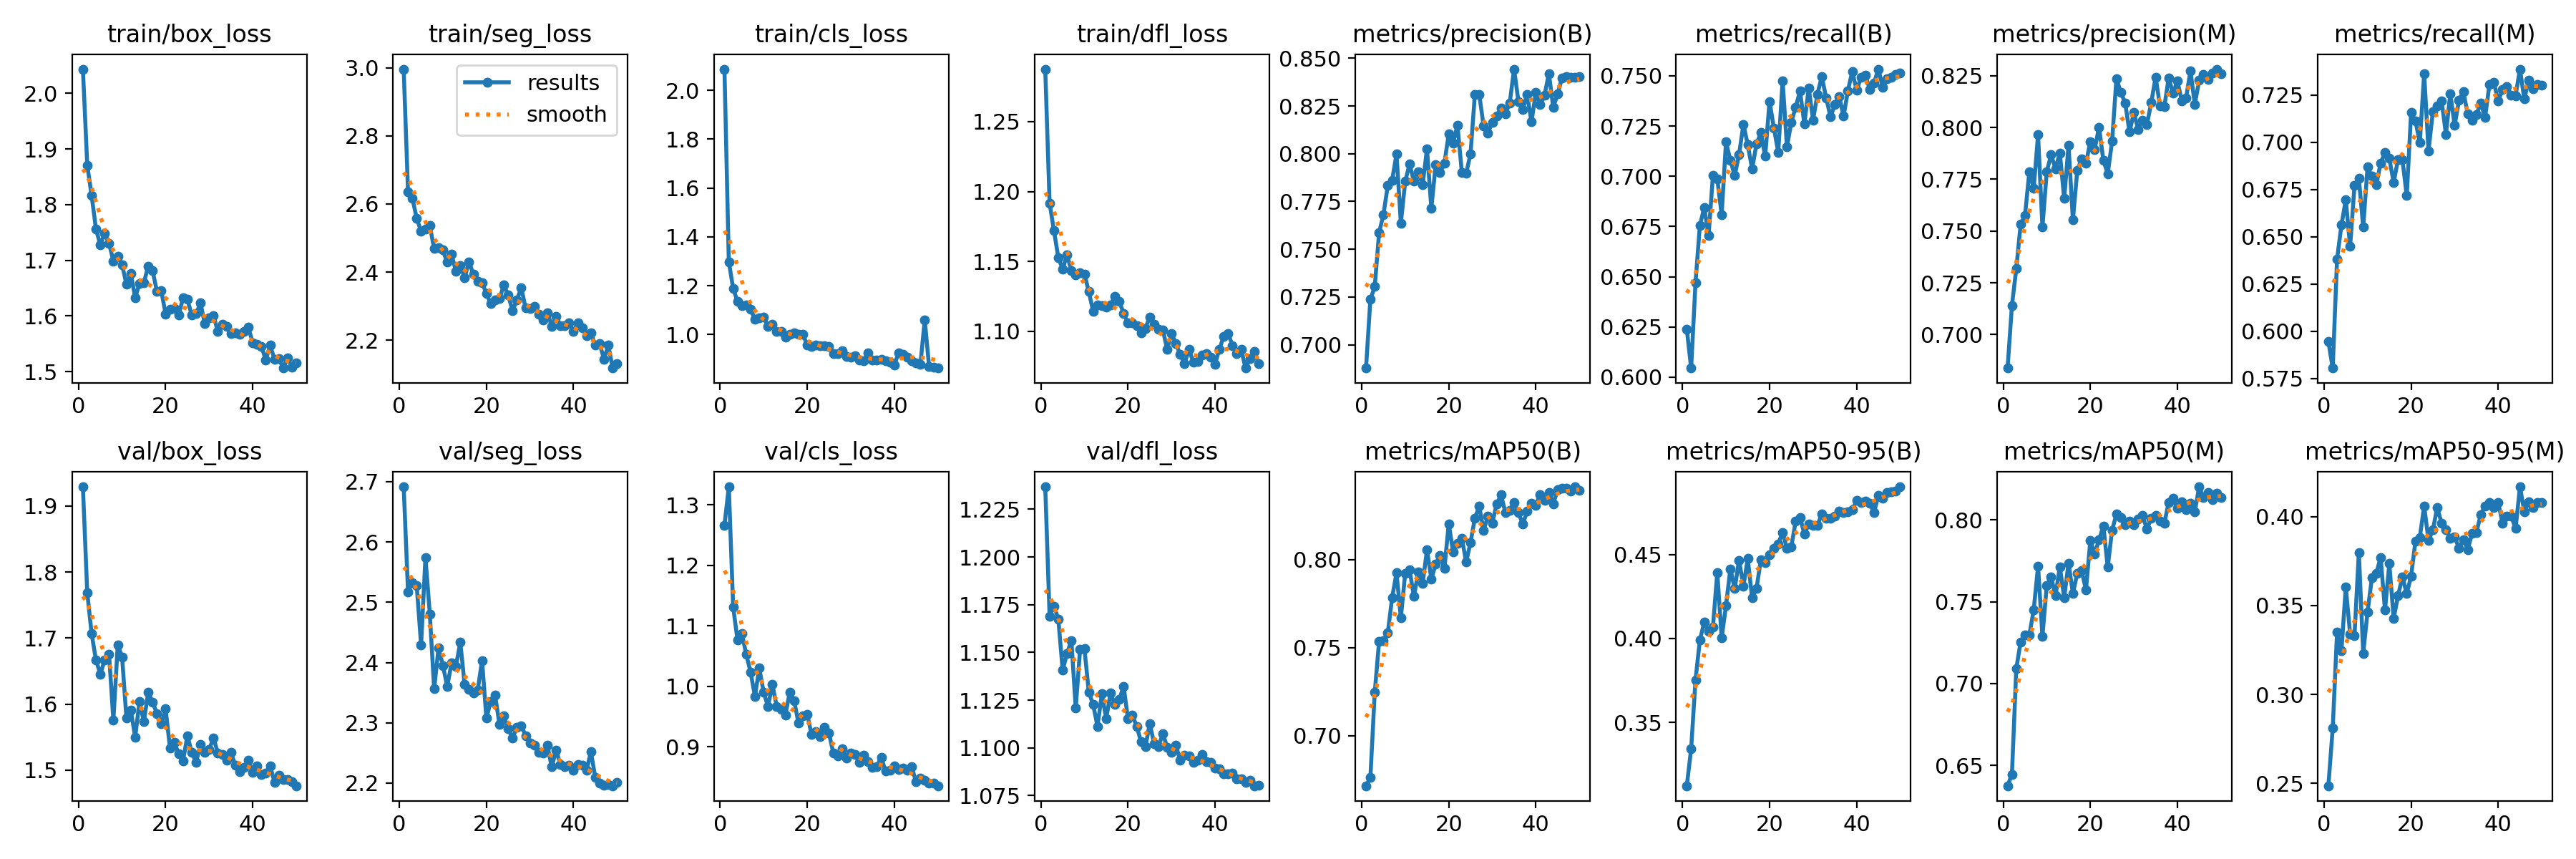

In [10]:
Image("/content/drive/MyDrive/ColabNotebooks/data/NuInsSeg_Nuclei_dataset/yolo_dataset/results/50_epochs-/results.png")

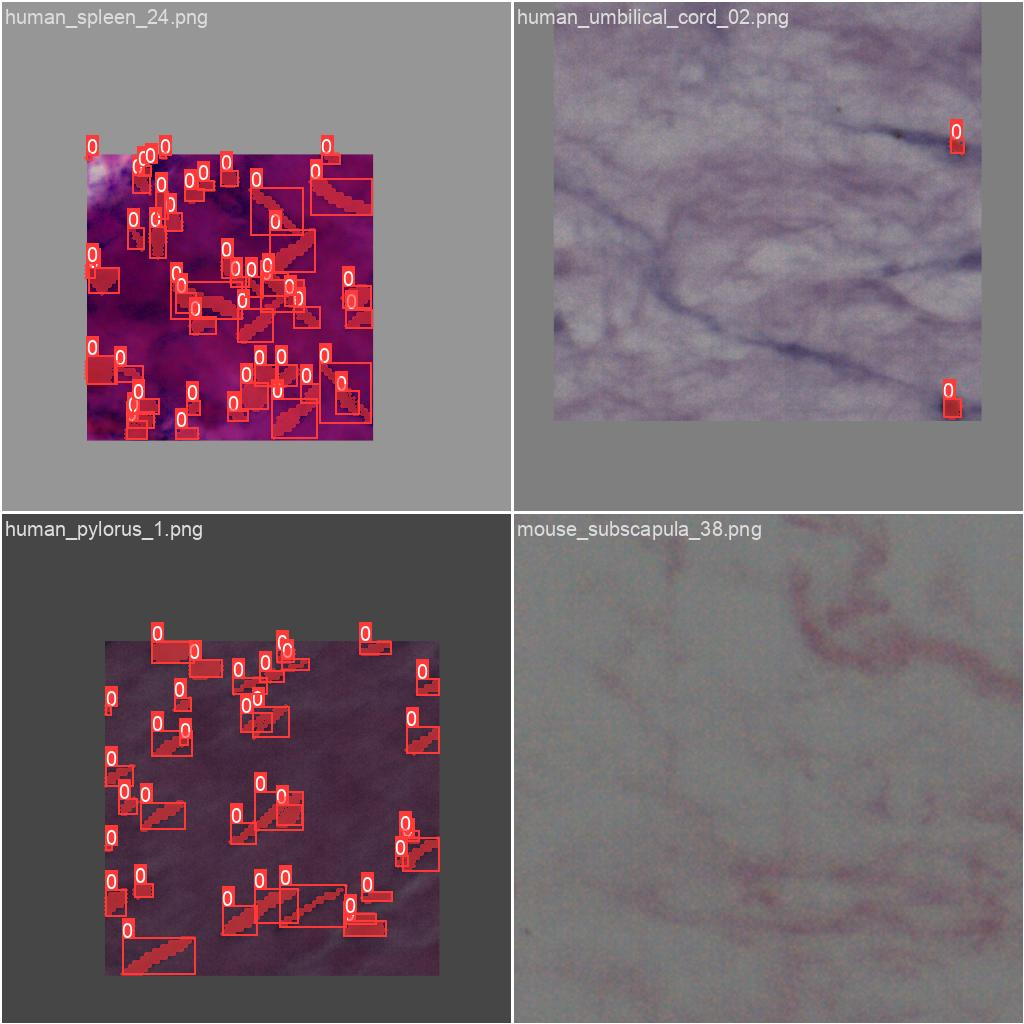

In [11]:
Image(filename='/content/drive/MyDrive/ColabNotebooks/data/NuInsSeg_Nuclei_dataset/yolo_dataset/results/50_epochs-/train_batch4682.jpg', width=900)

**Run inference**

Now that our model is trained, we can use it for inference.

In [12]:
#List the saved models in 'runs' directory. Note that you will see multiple 'train' subdirectories numbered 1, 2, 3, etc. The exact number depends on the number of epochs.
%ls /content/drive/MyDrive/ColabNotebooks/data/NuInsSeg_Nuclei_dataset/yolo_dataset/results/50_epochs-/weights

best.pt  last.pt


You can load the best model or the latest. I am picking the latest.

In [13]:
my_new_model = YOLO('//content/drive/MyDrive/ColabNotebooks/data/NuInsSeg_Nuclei_dataset/yolo_dataset/results/50_epochs-/weights/last.pt')

Load an image and perform inference (segmentation).

In [14]:
new_image = '/content/drive/MyDrive/ColabNotebooks/data/NuInsSeg_Nuclei_dataset/yolo_dataset/test/images/human_liver_22.png'
new_results = my_new_model.predict(new_image, conf=0.5)  #Adjust conf threshold



image 1/1 /content/drive/MyDrive/ColabNotebooks/data/NuInsSeg_Nuclei_dataset/yolo_dataset/test/images/human_liver_22.png: 512x512 35 Nucleis, 10.2ms
Speed: 1.5ms preprocess, 10.2ms inference, 5.9ms postprocess per image at shape (1, 3, 512, 512)


The results are stored in a variable 'new_results'. Since we only have one image for segmentation, we will only have one set of results. Therefore, let us work with that one result.

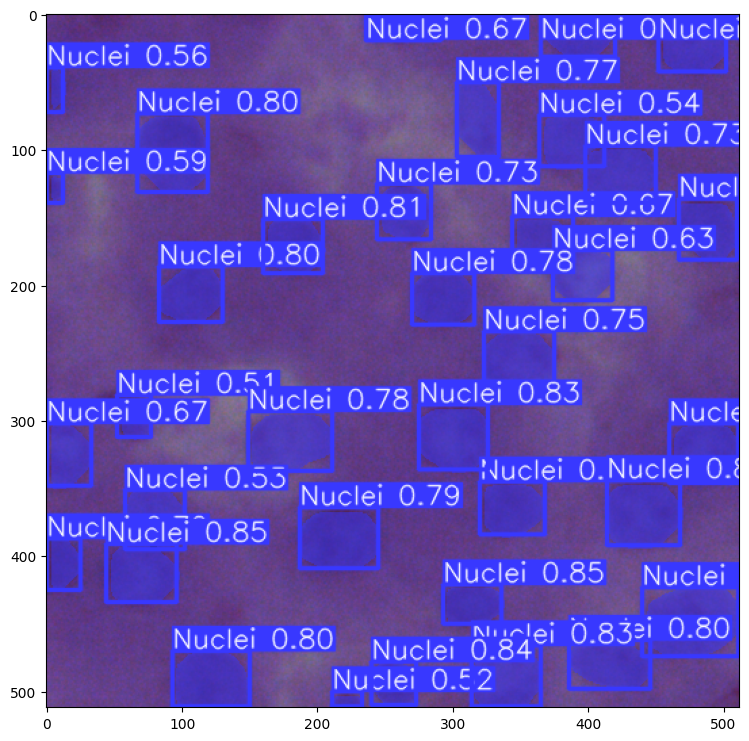

In [15]:
new_result_array = new_results[0].plot()
plt.figure(figsize=(9, 9))
plt.imshow(new_result_array)

# Segmenting and analyzing multiple images

Now, let us segment all our test images, perform measurements for all objects, capture them into a pandas dataframe and save the dataframe into a csv file.

In [16]:
import os
import csv
import cv2
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops

# Directory path to the input images folder
input_images_directory = "/content/drive/MyDrive/ColabNotebooks/data/NuInsSeg_Nuclei_dataset/yolo_dataset/test/images"

# Output directory where the CSV file will be saved
output_csv_path = "/content/drive/MyDrive/ColabNotebooks/data/NuInsSeg_Nuclei_dataset/yolo_dataset/test_results/output_objects_yolo.csv"

# Extract the directory name from the full path
output_dir_name = os.path.dirname(output_csv_path)

# Check if the directory exists
if not os.path.exists(output_dir_name):
    os.makedirs(output_dir_name)

# List of valid image extensions. This ensures that the code doesn't throw
# errors if your directory has non-images, like .json or other text files.
valid_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.gif']

# Open the CSV file for writing
with open(output_csv_path, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)

    # Write the header row in the CSV file
    csvwriter.writerow(["File Name", "Class Name", "Object Number", "Area", "Centroid", "BoundingBox"])

    # Loop over the images in the input folder
    for image_filename in os.listdir(input_images_directory):
        # Check if the file has a valid image extension
        if not any(image_filename.lower().endswith(ext) for ext in valid_extensions):
            continue

        image_path = os.path.join(input_images_directory, image_filename)
        new_im = cv2.imread(image_path)

        # Perform prediction on the new image
        new_results = my_new_model.predict(new_im, conf=0.2)  # Adjust conf threshold


        # Access the bounding boxes and class labels from new_results
        bounding_boxes = new_results[0].boxes.data.cpu().numpy()  # Move to CPU and convert to NumPy array
        class_labels = [0 for _ in range(len(bounding_boxes))]  # Assuming all objects are 'Nuclei'

        # Write the object-level information to the CSV file
        for i, bbox in enumerate(bounding_boxes):
            object_number = i + 1
            x1, y1, x2, y2 = bbox[:4]  # Only take the first 4 values
            area = (x2 - x1) * (y2 - y1)
            centroid = ((x1 + x2) / 2, (y1 + y2) / 2)
            bounding_box = (x1, y1, x2, y2)

            #
            class_name = 'Nuclei'  # Since all objects are 'Nuclei' in this example

            csvwriter.writerow([image_filename, class_name, object_number, area, centroid, bounding_box])

print("Object-level information saved to CSV file.")



0: 512x512 58 Nucleis, 15.4ms
Speed: 3.7ms preprocess, 15.4ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 38 Nucleis, 10.4ms
Speed: 2.0ms preprocess, 10.4ms inference, 3.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 112 Nucleis, 10.3ms
Speed: 2.3ms preprocess, 10.3ms inference, 4.8ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 47 Nucleis, 10.1ms
Speed: 2.0ms preprocess, 10.1ms inference, 3.4ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 7 Nucleis, 8.1ms
Speed: 3.2ms preprocess, 8.1ms inference, 2.5ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 15 Nucleis, 9.4ms
Speed: 2.1ms preprocess, 9.4ms inference, 2.8ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 51 Nucleis, 11.7ms
Speed: 1.5ms preprocess, 11.7ms inference, 3.3ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 39 Nucleis, 8.9ms
Speed: 2.2ms preprocess, 8.9ms inference, 4.4ms postprocess per image at shape

Object-level information saved to CSV file.


**Loading our measurements csv file and generating some plots**

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/data/NuInsSeg_Nuclei_dataset/yolo_dataset/test_results/output_objects_yolo.csv')


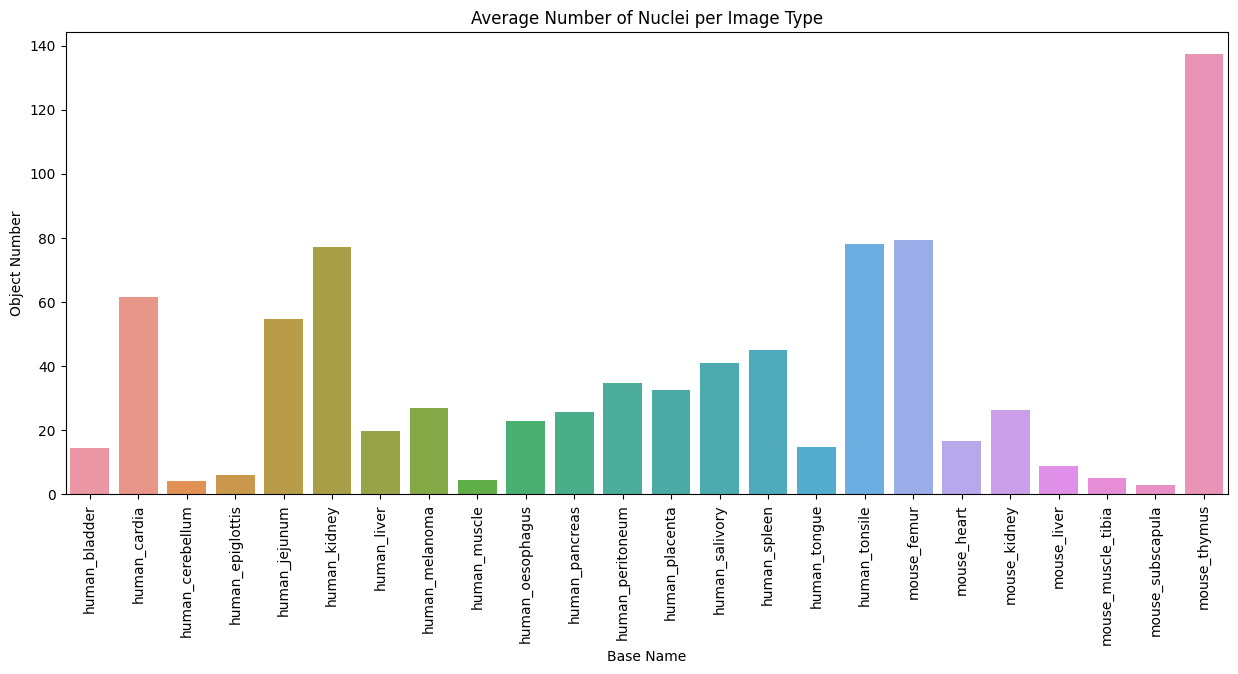

In [18]:
# 1. Average number of Nuclei per image for each unique 'File Name'.
# Extract the base name from the file name (excluding the number)
df['Base Name'] = df['File Name'].str.rsplit('_', 1).str[0]

# Group by the base name and compute the average number of nuclei
avg_nuclei_per_base_name = df.groupby('Base Name')['Object Number'].mean().reset_index()

plt.figure(figsize=(15, 6))
sns.barplot(data=avg_nuclei_per_base_name, x='Base Name', y='Object Number')
plt.title('Average Number of Nuclei per Image Type')
plt.xticks(rotation=90)
plt.show()


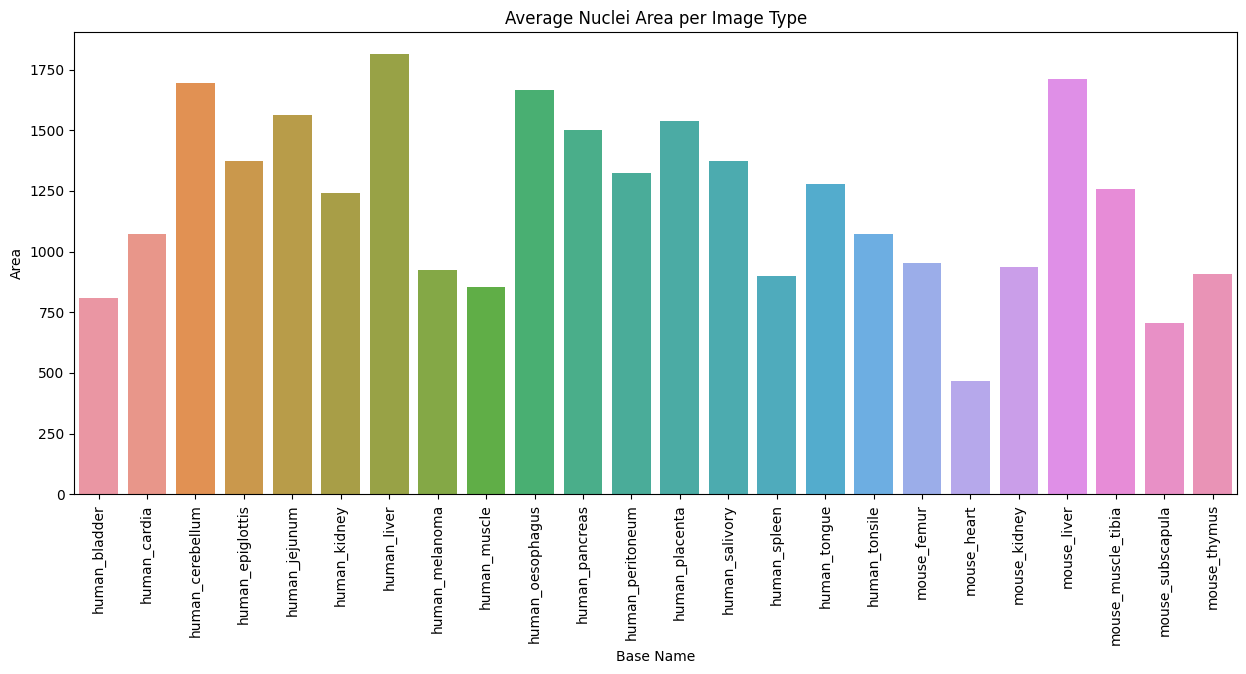

In [19]:
# 2. Average Nuclei area per unique 'File Name'
# Group by the base name and compute the average area
avg_area_per_base_name = df.groupby('Base Name')['Area'].mean().reset_index()

plt.figure(figsize=(15, 6))
sns.barplot(data=avg_area_per_base_name, x='Base Name', y='Area')
plt.title('Average Nuclei Area per Image Type')
plt.xticks(rotation=90)
plt.show()


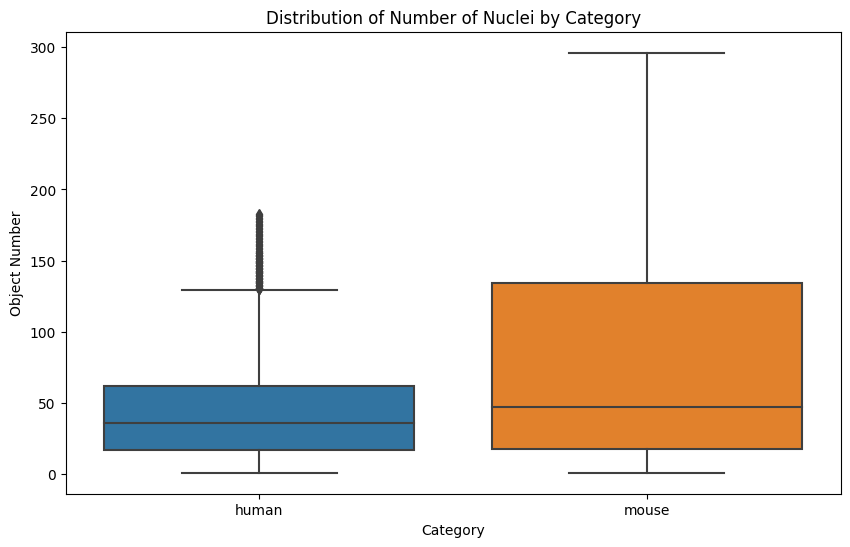

In [20]:
# 3. Distribution of Number of Nuclei by Category (e.g., "human" or "mouse")
df['Category'] = df['File Name'].str.split('_').str[0]

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Category', y='Object Number')
plt.title('Distribution of Number of Nuclei by Category')
plt.show()


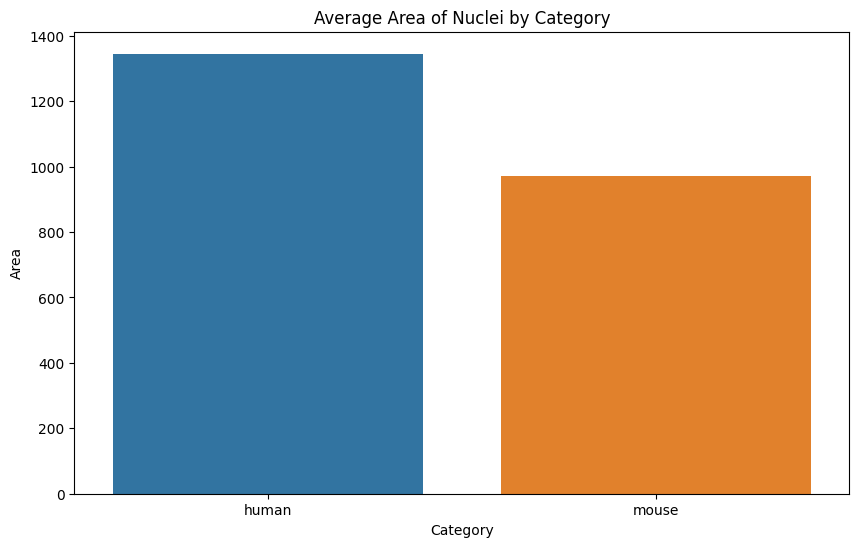

In [21]:
# 4. Average area of Nuclei by Category
avg_area_by_category = df.groupby('Category')['Area'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_area_by_category, x='Category', y='Area')
plt.title('Average Area of Nuclei by Category')
plt.show()